# **Локальная сходимость метода тяжёлого шарика.** (3 балла)

1. В этой задаче мы будем работать с методом тяжёлого шарика  

$$
x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta (x_k - x_{k-1})
$$


Известно, что для квадратичных функций наилучшим выбором гиперпараметров является  $\alpha^* = \dfrac{4}{(\sqrt{L} + \sqrt{\mu})^2}, \beta^* = \dfrac{(\sqrt{L} - \sqrt{\mu})^2}{(\sqrt{L} + \sqrt{\mu})^2}$, что обеспечивает ускоренную линейную сходимость для сильно выпуклой квадратичной функции.

Рассмотрим следующую непрерывно дифференцируемую, сильно выпуклую с параметром $\mu$ и гладкую с параметром $L$ функцию:

$$
f(x) =
\begin{cases}
\frac{25}{2}x^2, & \text{if } x < 1 \\
\frac12x^2 + 24x - 12, & \text{if } 1 \leq x < 2 \\
\frac{25}{2}x^2 - 24x + 36, & \text{if } x \geq 2
\end{cases}
\quad
\nabla f(x) =
\begin{cases}
25x, & \text{if } x < 1 \\
x + 24, & \text{if } 1 \leq x < 2 \\
25x - 24, & \text{if } x \geq 2
\end{cases}
$$


1.  Как доказать, что данная функция является выпуклой? Сильно выпуклой? Гладкой?
2.  Найдите константы $\mu$ и $L$ для данной функции.
3.  Постройте график значений функции для $x \in [-4, 4]$.
4.  Запустите метод тяжёлого шарика для функции с оптимальными гиперпараметрами для квадратичных функций, начиная с $x_0 = 3.5$.
5.  Измените начальную точку на $x_0 = 3.4$. Что вы наблюдаете? Как можно охарактеризовать такое поведение метода?

6.  Измените гиперпараметр на $\alpha^{\text{Global}} = \frac{2}{L}$, $\beta^{\text{Global}} = \frac{\mu}{L}$ и снова запустите метод из $x_0 = 3.4$. Проверьте, есть ли здесь ускоренная сходимость.



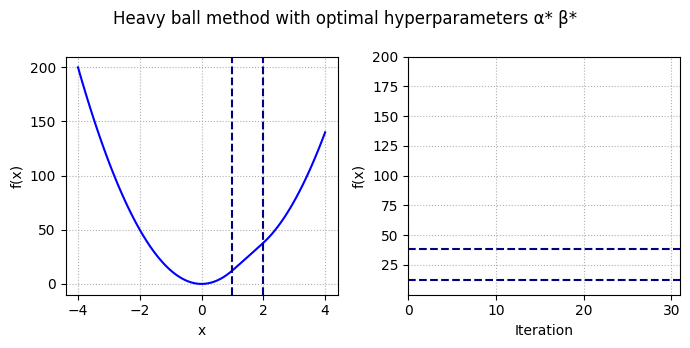

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Gradient of the function
def grad_f(x):


# Heavy Ball method implementation
def heavy_ball_method(alpha, beta, x0, num_iterations):
    x = np.zeros(num_iterations + 1)
    x_prev = x0
    x_curr = x0  # Initialize x[1] same as x[0] to start the algorithm
    for i in range(num_iterations):
    return x

# Parameters


# Generate the trajectory of the method
trajectory = heavy_ball_method(alpha_star, beta_star, x0, num_iterations)

# Setup the figure and axes for the animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3.5))
fig.suptitle("Heavy ball method with optimal hyperparameters α* β*")

# Function for updating the animation
def update(i):
    ax1.clear()
    ax2.clear()

    # Plot f(x) and trajectory
    x_vals = np.linspace(-4, 4, 100)
    f_vals = np.piecewise(x_vals, [x_vals < 1, (x_vals >= 1) & (x_vals < 2), x_vals >= 2],
                        [lambda x: 12.5 * x**2, lambda x: .5 * x**2 + 24 * x - 12, lambda x: 12.5 * x**2 - 24 * x + 36])
    ax1.plot(x_vals, f_vals, 'b-')
    ax1.plot(trajectory[:i], [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]], 'ro-')
    # Add vertical dashed lines at x=1 and x=2 on the left subplot
    ax1.axvline(x=1, color='navy', linestyle='--')
    ax1.axvline(x=2, color='navy', linestyle='--')

    # Plot function value from iteration
    f_trajectory = [None for x in trajectory]
    f_trajectory[:i] = [12.5 * x**2 if x < 1 else .5 * x**2 + 24 * x - 12 if x < 2 else 12.5 * x**2 - 24 * x + 36 for x in trajectory[:i]]
    ax2.plot(range(len(trajectory)), f_trajectory, 'ro-')
    ax2.set_xlim(0, len(trajectory))
    ax2.set_ylim(min(f_vals), max(f_vals))
    # Add horizontal dashed lines at f(1) and f(2) on the right subplot
    f_1 = 12.5 * 1.0**2
    f_2 = .5 * 2.**2 + 24 * 2. - 12
    ax2.axhline(y=f_1, color='navy', linestyle='--')
    ax2.axhline(y=f_2, color='navy', linestyle='--')

    # ax1.set_title("Function f(x) and Trajectory")
    ax1.set_xlabel("x")
    ax1.set_ylabel("f(x)")
    ax1.grid(linestyle=":")

    # ax2.set_title("Function Value from Iteration")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("f(x)")
    ax2.grid(linestyle=":")

    plt.tight_layout()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=num_iterations, repeat=False, interval=100)
HTML(ani.to_jshtml())

# **Градиентный спуск на задаче логистической регрессии** (5 баллов)

В этой задаче мы будем работать с ускоренными методами, применяемыми к задаче

Логистическая регрессия — это стандартная модель в задачах классификации. Для простоты рассмотрим только случай бинарной классификации. Неформально задача формулируется следующим образом: имеется обучающая выборка $\{(a_i, b_i)\}_{i=1}^m$, состоящая из $m$ векторов $a_i \in \mathbb{R}^n$ (признаков) и соответствующих чисел $b_i \in \{-1, 1\}$ (меток или классов). Цель — построить алгоритм $b(\cdot)$, который для любого нового вектора признаков $a$ автоматически определяет его класс $b(a) \in \{-1, 1\}$.

В модели логистической регрессии определение класса выполняется на основе знака линейной комбинации компонентов вектора $a$ с некоторыми фиксированными коэффициентами $x \in \mathbb{R}^n$:
$$
b(a) := \text{sign}(\langle a, x \rangle).
$$
Коэффициенты $x$ являются параметрами модели и подбираются путём решения следующей задачи оптимизации:
$$
\tag{LogReg}
\min_{x \in \mathbb{R}^n} \left( \frac{1}{m} \sum_{i=1}^m \ln(1 + \exp(-b_i \langle a_i, x \rangle)) + \frac{\lambda}{2} \|x\|^2 \right),
$$
где $\lambda \geq 0$ — коэффициент регуляризации (параметр модели).

1. Будет ли задача LogReg выпуклой при $\lambda = 0$? Чему равен градиент целевой функции? Будет ли она сильно выпуклой? А если добавить регуляризацию с $\lambda > 0$?

2. Мы будем работать с реальными данными для $A$ и $b$: возьмите набор данных о грибах. Будьте осторожны, вам нужно будет предсказать, ядовит гриб или съедобен. Плохая модель может привести к летальному исходу в этом упражнении.


In [ ]:
import requests
from sklearn.datasets import load_svmlight_file


# Load the dataset from the file
data = load_svmlight_file('mushrooms.txt')
A, b = data[0].toarray(), data[1]
n, d = A.shape

print("Data loaded successfully.")
print(f"Number of samples: {n}, Number of features: {d}")

Data loaded successfully.
Number of samples: 8124, Number of features: 112


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=214)

3. Для обучающей части $A_{\text{train}}$, $b_{\text{train}}$ оцените константы $\mu, L$ задачи обучения/оптимизации. Используйте одно и то же небольшое значение $\lambda$ для всех экспериментов.

4. Обучите модель с помощью градиентного спуска и метода "тяжёлого шарика" с шагом $\frac{1}{L}$. Постройте график: точность в зависимости от номера итерации.
$
\tag{HB}
x_{k+1} = x_k - \alpha \nabla f(x_k) + \beta (x_k - x_{k-1})
$

5. Зафиксируйте шаг $\alpha = \frac{1}{L}$ и исследуйте различные значения момента $\beta$ от $-1$ до $1$. Выберите свой собственный критерий сходимости и постройте график сходимости для нескольких значений момента на одном графике. Всегда ли сходимость монотонна?

6. Для наилучшего значения момента $\beta$ постройте зависимость точности модели на тестовой выборке от времени работы метода. Добавьте на тот же график сходимость градиентного спуска с шагом $\frac{1}{L}$. Сделайте вывод. Убедитесь, что вы используете одно и то же значение $\lambda$ для обоих методов.

7. Решите задачу логистической регрессии с помощью метода Нестерова.

$
\tag{NAG}
x_{k+1} = x_k - \alpha \nabla f(x_k + \beta (x_k - x_{k-1})) + \beta (x_k - x_{k-1})  
$

8. Зафиксируйте шаг $\frac{1}{L}$ и исследуйте различные значения момента $\beta$ от $-1$ до $1$. Проверьте также значения момента, равные $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации), а если вы решаете сильно выпуклую задачу, то и $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$. Постройте сходимость метода в зависимости от числа итераций (критерий сходимости выберите сами) для разных значений момента. Всегда ли сходимость монотонна?

9. Для наилучшего значения момента $\beta$ постройте зависимость точности модели на тестовой выборке от времени работы метода. Добавьте этот график к графикам для тяжёлого шарика и градиентного спуска из предыдущих шагов. Сделайте вывод.

10. Теперь мы отбросим оценённое значение $L$ и попробуем сделать его адаптивным. Сделаем подбор константы $L$ адаптивным.

$$
f(y) \leq f(x^k) + \langle \nabla f(x^k), y - x^k \rangle + \frac{L}{2}\|x^k - y\|_2^2
$$


В частности, процедура может работать так:

In [ ]:
def backtracking_L(f, grad, x, h, L0, rho, maxiter=100):
    L = L0
    fx = f(x)
    gradx = grad(x)
    iter = 0
    while iter < maxiter :
        y = x - 1 / L * h
        if f(y) <= fx - 1 / L * gradx.dot(h) + 1 / (2 * L) * h.dot(h):
            break
        else:
            L = L * rho

        iter += 1
    return L

Что следует взять в качестве $h$? Должно ли $\rho$ быть больше или меньше $1$? Следует ли брать $L_0$ большим или маленьким? Постройте аналогичный рисунок, как на предыдущем шаге, для адаптивно вычисляемого $L$ (6 линий — GD, HB, NAG, GD adaptive L, HB adaptive L, NAG adaptive L).

# **Cтохастический градиентный спуск** (3 балла)

Реализуйте метод стохастического градиентного спуска и SAG. На основе построенных в ходе эксперимента (код для него уже реализова ниже) графиков сделайте выводы.

### Binary logistic regression

### Linear least squares

`Ваш ответ здесь`

# **L-BFGS** (4 балла)

Метод BFGS принадлежит классу квазиньютоновских методов, которые на каждом шаге аппроксимируют настоящий гессиан $\nabla^2 f(x_k)$ с помощью некоторой матрицы $B_k$ и выбирают направление спуска $d_k$ как решение следующей системы (аналогичной ньютоновской):

$$
B_k d_k = -\nabla f(x_k) \quad \Leftrightarrow \quad d_k = -H_k \nabla f(x_k), \quad \text{где } H_k := B_k^{-1}.
$$

Дальше, из текущей точки $x_k$, как обычно, выполняется шаг в этом направлении:

$$
x_{k+1} = x_k + \alpha_k d_k
$$

где $\alpha_k > 0$ — длина шага, настраиваемая с помощью линейного поиска.

Основная работа на каждой итерации квазиньютоновского метода затрачивается на построение аппроксимации гессиана и вычисление направления поиска.

Начиная с $B_0 = I$, алгоритм пересчитывает аппроксимацию гессиана по правилу $B_{k+1} = B_k + U_k$, где $U_k$ — некоторое низкорапговое обновление. Маленький ранг $U_k$ необходим для построения эффективной процедуры вычисления обратной матрицы $H_{k+1} = B_{k+1}^{-1} = (B_k + U_k)^{-1}$. Конкретный вид обновления $U_k$ следует из выполнения нескольких требований. Основное из них — уравнение секущей: $B_{k+1}(x_{k+1} - x_k) = \nabla f(x_{k+1}) - \nabla f(x_k)$, справедливое для всех квазиньютоновских методов. Одного этого уравнения недостаточно, чтобы однозначно определить $B_{k+1}$. Конкретную квазиньютоновскую схему получают с помощью наложения на аппроксимацию гессиана дополнительных требований.

Наиболее популярным и устойчивым на практике является правило BFGS (по фамилиям авторов: Бройден-Флетчер-Гольдфарб-Шанно). Обозначим:

$$
s_k := x_{k+1} - x_k, \quad y_k := \nabla f(x_{k+1}) - \nabla f(x_k).
$$

Тогда схема пересчёта BFGS имеет следующий вид:

$$
B_{k+1} = B_k - \frac{B_k s_k s_k^T B_k}{\langle B_k s_k, s_k \rangle} + \frac{y_k y_k^T}{\langle y_k, s_k \rangle}
$$

$$
H_{k+1} = \left( I_n - \frac{s_k y_k^T}{\langle y_k, s_k \rangle} \right) H_k \left( I_n - \frac{y_k s_k^T}{\langle y_k, s_k \rangle} \right) + \frac{s_k s_k^T}{\langle y_k, s_k \rangle} \tag{3}
$$

Метод L-BFGS является модификацией метода BFGS для случаев, когда не удаётся поместить матрицу $H_k$ в память. Для этого на каждой итерации метода поддерживается история $\mathcal{H}_k := \{(s_{k-i}, y_{k-i})\}_{i=1}^l$ из последних $l$ векторов, где $l$ — некоторый параметр (типичное значение $l = 10$; при $k < l$ история $\mathcal{H}_k$ состоит только из $k$ пар). Далее в качестве матрицы $H_k$ выбирается матрица, полученная с помощью $l$-кратного рекуррентного применения формулы обновления (3), где в качестве начальной матрицы выбирается

$$
H_{k-l} := \gamma_0^{(k)} I_n, \quad \text{где } \gamma_0^{(k)} := \frac{\langle y_{k-1}, s_{k-1} \rangle}{\langle y_{k-1}, y_{k-1} \rangle} \tag{4}
$$

Таким образом, метод L-BFGS является усечённой версией BFGS со специальным выбором начальной матрицы по формуле (4) (так называемое правило Варзилая-Ворвейна).

Преимуществом такой схемы является то, что для её реализации никаких матриц хранить в памяти не требуется. Действительно, напомним, что методу сама матрица $H_k$ не нужна, а нужен вектор $d_k = -H_k \nabla f(x_k)$. Таким образом, нужна процедура, вычисляющая результат умножения L-BFGS матрицы $H_k$ на произвольный вектор $v \in \mathbb{R}^n$. Умножая обе части (3) на $v$, видно, что такую процедуру можно организовать рекурсивно без явного формирования каких-либо матриц в памяти:

**Алгоритм 1** Рекурсивное умножение L-BFGS матрицы на вектор  
function BFGS_Multiply($v, \mathcal{H}, \gamma_0$)  
if $\mathcal{H} = \emptyset$ then  
    return $\gamma_0 v$  
end if  
$(s, y)$ ← последняя пара из $\mathcal{H}$.  
$\mathcal{H}'$ ← $\mathcal{H}$ без последней пары.  
$v'$ ← $v - \frac{\langle s, v \rangle}{\langle y, s \rangle} y$  
$z$ ← BFGS_Multiply($v', \mathcal{H}', \gamma_0$)  
return $z + \frac{\langle s, v \rangle - \langle y, z \rangle}{\langle y, s \rangle} s$  
end function  

Имея в распоряжении указанную процедуру, направление $d_k$ вычислить легко:

**Алгоритм 2** Вычисление направления поиска $d_k$ в методе L-BFGS  
function LBFGS_DIRECTION  
$(s, y)$ ← последняя пара из $\mathcal{H}_k$  
$\gamma_0$ ← $\frac{\langle y, s \rangle}{\langle y, y \rangle}$  
return BFGS_Multiply($-\nabla f(x_k), \mathcal{H}_k, \gamma_0$)  
end function

In [ ]:
import numpy as np
from collections import defaultdict, deque  # Use this for effective implementation of L-BFGS
from utils import get_line_search_tool


def lbfgs(oracle, x_0, tolerance=1e-4, max_iter=500, memory_size=10,
          line_search_options=None, display=False, trace=False):
    """
    Limited-memory Broyden–Fletcher–Goldfarb–Shanno's method for optimization.

    Parameters
    ----------
    oracle : BaseSmoothOracle-descendant object
        Oracle with .func() and .grad() methods implemented for computing
        function value and its gradient respectively.
    x_0 : 1-dimensional np.array
        Starting point of the algorithm
    tolerance : float
        Epsilon value for stopping criterion.
    max_iter : int
        Maximum number of iterations.
    memory_size : int
        The length of directions history in L-BFGS method.
    line_search_options : dict, LineSearchTool or None
        Dictionary with line search options. See LineSearchTool class for details.
    display : bool
        If True, debug information is displayed during optimization.
        Printing format is up to a student and is not checked in any way.
    trace:  bool
        If True, the progress information is appended into history dictionary during training.
        Otherwise None is returned instead of history.

    Returns
    -------
    x_star : np.array
        The point found by the optimization procedure
    message : string
        'success' or the description of error:
            - 'iterations_exceeded': if after max_iter iterations of the method x_k still doesn't satisfy
              the stopping criterion.
    history : dictionary of lists or None
        Dictionary containing the progress information or None if trace=False.
        Dictionary has to be organized as follows:
            - history['func'] : list of function values f(x_k) on every step of the algorithm
            - history['time'] : list of floats, containing time in seconds passed from the start of the method
            - history['grad_norm'] : list of values Euclidian norms ||g(x_k)|| of the gradient on every step of the algorithm
            - history['x'] : list of np.arrays, containing the trajectory of the algorithm. ONLY STORE IF x.size <= 2
    """
    history = defaultdict(list) if trace else None
    line_search_tool = get_line_search_tool(line_search_options)
    x_k = np.copy(x_0)

    # TODO: Implement L-BFGS method.
    # Use line_search_tool.line_search() for adaptive step size.
    return x_k, 'success', history


In [ ]:
import numpy as np
import scipy
from scipy.special import expit


class BaseSmoothOracle(object):
    """
    Base class for implementation of oracles.
    """

    def func(self, x):
        """
        Computes the value of function at point x.
        """
        raise NotImplementedError('Func oracle is not implemented.')

    def grad(self, x):
        """
        Computes the gradient at point x.
        """
        raise NotImplementedError('Grad oracle is not implemented.')

    def hess(self, x):
        """
        Computes the Hessian matrix at point x.
        """
        raise NotImplementedError('Hessian oracle is not implemented.')

    def func_directional(self, x, d, alpha):
        """
        Computes phi(alpha) = f(x + alpha*d).
        """
        return np.squeeze(self.func(x + alpha * d))

    def grad_directional(self, x, d, alpha):
        """
        Computes phi'(alpha) = (f(x + alpha*d))'_{alpha}
        """
        return np.squeeze(self.grad(x + alpha * d).dot(d))

    def hess_vec(self, x, v):
        """
        Computes matrix-vector product with Hessian matrix f''(x) v
        """
        return self.hess(x).dot(v)


class LogRegL2Oracle(BaseSmoothOracle):
    """
    Oracle for logistic regression with l2 regularization:
         func(x) = 1/m sum_i log(1 + exp(-b_i * a_i^T x)) + regcoef / 2 ||x||_2^2.

    Let A and b be parameters of the logistic regression (feature matrix
    and labels vector respectively).
    For user-friendly interface use create_log_reg_oracle()

    Parameters
    ----------
        matvec_Ax : function
            Computes matrix-vector product Ax, where x is a vector of size n.
        matvec_ATy : function of y
            Computes matrix-vector product A^Ty, where y is a vector of size m.
        matmat_ATsA : function
            Computes matrix-matrix-matrix product A^T * Diag(s) * A,
    """

    def __init__(self, matvec_Ax, matvec_ATx, matmat_ATsA, b, regcoef):
        self.matvec_Ax = matvec_Ax
        self.matvec_ATx = matvec_ATx
        self.matmat_ATsA = matmat_ATsA
        self.b = b
        self.regcoef = regcoef

    def func(self, x):
        # TODO: Implement
        return None

    def grad(self, x):
        # TODO: Implement
        return None

    def hess(self, x):
        # TODO: Implement
        return None


class LogRegL2OptimizedOracle(LogRegL2Oracle):
    """
    Oracle for logistic regression with l2 regularization
    with optimized *_directional methods (are used in line_search).

    For explanation see LogRegL2Oracle.
    """

    def __init__(self, matvec_Ax, matvec_ATx, matmat_ATsA, b, regcoef):
        super().__init__(matvec_Ax, matvec_ATx, matmat_ATsA, b, regcoef)

    def func_directional(self, x, d, alpha):
        # TODO: Implement optimized version with pre-computation of Ax and Ad
        return None

    def grad_directional(self, x, d, alpha):
        # TODO: Implement optimized version with pre-computation of Ax and Ad
        return None


def create_log_reg_oracle(A, b, regcoef, oracle_type='usual'):
    """
    Auxiliary function for creating logistic regression oracles.
        `oracle_type` must be either 'usual' or 'optimized'
    """
    matvec_Ax = lambda x: x  # TODO: Implement
    matvec_ATx = lambda x: x  # TODO: Implement

    def matmat_ATsA(s):
        # TODO: Implement
        return None

    if oracle_type == 'usual':
        oracle = LogRegL2Oracle
    elif oracle_type == 'optimized':
        oracle = LogRegL2OptimizedOracle
    else:
        raise 'Unknown oracle_type=%s' % oracle_type
    return oracle(matvec_Ax, matvec_ATx, matmat_ATsA, b, regcoef)


In [ ]:
import numpy as np

class LineSearchTool(object):
    """
    Line search tool for adaptively tuning the step size of the algorithm.

    method : String containing 'Wolfe', 'Armijo' or 'Constant'
        Method of tuning step-size.
        Must be be one of the following strings:
            - 'Wolfe' -- enforce strong Wolfe conditions;
            - 'Armijo" -- adaptive Armijo rule;
            - 'Constant' -- constant step size.
            - 'Best' -- optimal step size inferred via analytical minimization.
    kwargs :
        Additional parameters of line_search method:

        If method == 'Wolfe':
            c1, c2 : Constants for strong Wolfe conditions
            alpha_0 : Starting point for the backtracking procedure
                to be used in Armijo method in case of failure of Wolfe method.
        If method == 'Armijo':
            c1 : Constant for Armijo rule
            alpha_0 : Starting point for the backtracking procedure.
        If method == 'Constant':
            c : The step size which is returned on every step.
    """
    def __init__(self, method='Wolfe', **kwargs):
        self._method = method
        if self._method == 'Wolfe':
            self.c1 = kwargs.get('c1', 1e-4)
            self.c2 = kwargs.get('c2', 0.9)
            self.alpha_0 = kwargs.get('alpha_0', 1.0)
        elif self._method == 'Armijo':
            self.c1 = kwargs.get('c1', 1e-4)
            self.alpha_0 = kwargs.get('alpha_0', 1.0)
        elif self._method == 'Constant':
            self.c = kwargs.get('c', 1.0)
        elif self._method == 'Best':
            pass
        else:
            raise ValueError('Unknown method {}'.format(method))

    @classmethod
    def from_dict(cls, dict):
        return cls(**dict)

    def to_dict(self):
        return self.__dict__

    def line_search(self, oracle, x_k, d_k, previous_alpha=None):
        """
        Finds the step size alpha for a given starting point x_k
        and for a given search direction d_k that satisfies necessary
        conditions for phi(alpha) = oracle.func(x_k + alpha * d_k).

        Parameters
        ----------
        oracle : BaseSmoothOracle-descendant object
            Oracle with .func_directional() and .grad_directional() methods implemented for computing
            function values and its directional derivatives.
        x_k : np.array
            Starting point
        d_k : np.array
            Search direction
        previous_alpha : float or None
            Starting point to use instead of self.alpha_0 to keep the progress from
             previous steps. If None, self.alpha_0, is used as a starting point.

        Returns
        -------
        alpha : float or None if failure
            Chosen step size
        """
        # TODO: Implement line search procedures for Armijo, Wolfe and Constant steps.
        # TODO: BONUS: Also fallback into oracle.minimize_directional() if method == 'Best'
        return None


def get_line_search_tool(line_search_options=None):
    if line_search_options:
        if type(line_search_options) is LineSearchTool:
            return line_search_options
        else:
            return LineSearchTool.from_dict(line_search_options)
    else:
        return LineSearchTool()

### Эксперимент 1: Выбор размера истории в методе L-BFGS

Исследуйте, как влияет размер истории в методе L-BFGS на поведение метода.

Прежде всего, оцените размер требуемой памяти и сложность итерации метода L-BFGS в зависимости от размера истории $l$ и размерности пространства $n$. (Здесь не нужно учитывать сложность линейного поиска.)

Рассмотрите несколько вариантов выбора размера истории (например, $l = 0, l = 1, l = 5, l = 10, l = 50, l = 100$) и постройте следующие графики:

(a) Зависимость относительного квадрата нормы градиента $\| \nabla f(x_k) \|^2 / \| \nabla f(x_0) \|^2$ (в логарифмической шкале) против номера итерации.

(b) Зависимость относительного квадрата нормы градиента $\| \nabla f(x_k) \|^2 / \| \nabla f(x_0) \|^2$ (в логарифмической шкале) против реального времени работы.

При этом разные варианты выбора размера истории нужно рисовать на одном и том же графике.

В качестве тестовой функции возьмите логистическую регрессию с $l^2$-регуляризатором на данных _gisette_ или _news20.binary_ с сайта LIBSVM. Коэффициент регуляризации и начальную точку выберите стандартным образом: $\lambda = 1/m, x_0 = 0$.

Какие выводы можно сделать?




### Эксперимент 2: Сравнение методов на реальной задаче логистической регрессии

Сравните метод L-BFGS и градиентный спуск (реализацию взять из предыдущего задания) на реальной задаче логистической регрессии. В качестве реальных данных используйте следующие наборы данных с сайта LIBSVM: «a8a», «gisette», «real-sim», «news20.binary», «rev1.binary». Коэффициент регуляризации возьмите стандартным: $\lambda = 1/m$. Параметры всех методов возьмите равными параметрам по умолчанию. Начальную точку выберите $x_0 = 0$.

Постройте следующие графики:

(a) Зависимость значения функции против номера итерации метода.

(b) Зависимость значения функции против реального времени работы.

(c) Зависимость относительного квадрата нормы градиента $\| \nabla f(x_k) \|^2 / \| \nabla f(x_0) \|^2$ (в логарифмической шкале) против реального времени работы.

При этом все методы нужно рисовать на одном и том же графике.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в каких ситуациях?

### Эксперимент 3: Какая точность оптимизации нужна в реальных задачах?

В реальных задачах целевая функция, которая оптимизируется методами оптимизации, как правило, не является конечным критерием качества решения задачи. Например, рассмотрим задачу классификации и модель логистической регрессии. В этом случае оптимизируемой функцией является логистическая функция потерь. Однако само значение логистической функции потерь, с точки зрения решения задачи классификации, представляет мало интереса. А что действительно представляет интерес — это, например, процент ошибок при классификации на тестовой выборке. Возникает естественный вопрос: как влияет точность оптимизации целевой функции на итоговое качество решения самой задачи?

В этом эксперименте Вам предлагается исследовать этот вопрос для задачи бинарной классификации и модели логистической регрессии с $l^2$-регуляризатором. Для этого выберите несколько реальных наборов данных и выполните следующий эксперимент.

Возьмите любой метод оптимизации (например, L-BFGS) и запустите его (на обучающей выборке) с разными параметрами требуемой точности $\epsilon$. Для каждого $\epsilon$ возьмите итоговую точку $\hat{x}$, которую вернул метод, и сравните качество прогноза логистической регрессии $b_{\text{pred}} := \text{sign} \left( A_{\text{test}} \, \hat{x} \right)$ с истинными значениями меток $b_{\text{test}}$. При сравнении используйте процент ошибок — среднее число позиций, в которых векторы $b_{\text{pred}}$ и $b_{\text{test}}$ отличаются. Нарисуйте график зависимости процента ошибок от точности оптимизации $\epsilon$ (в логарифмической шкале). Коэффициент регуляризации и начальную точку возьмите стандартными: $\lambda = 1/m$ и $x_0 = 0$.

В чём разница между маленькой точностью оптимизации и большой? Какие выводы можно сделать?

**Рекомендация.** Параметр $\epsilon$ имеет смысл перебрать по логарифмической сетке: от самой маленькой точности $\epsilon = 1$ (никакой оптимизации, вернуть начальную точку $x_0$) до самой большой точности $\epsilon = 10^{-6}$ или $\epsilon = 10^{-8}$ (оптимизировать функцию до «машинной» точности).

# **Фрэнк-Вулф vs Проективный градиентный спуск** (4 балла)

Рассмотрим следующую простую квадратичную задачу оптимизации

$$
f(w) = \frac{1}{2} \langle Ax, x \rangle - \langle b, x \rangle \to \min_{x \in \mathbb{R}^n}; \quad \text{при условиях: } \mathbf{1}^\top x = 1, \, x \geq 0
$$

### 1. Сгенерируйте и решите эту задачу численно с помощью CVXPY. Вычислите оптимальное решение $x_{\text{optimal}}$


In [ ]:
import jax
from jax import numpy as jnp
from jax import random
from jax import grad

# можно менять при необходимости
def generate_problem(n=300, mu=0, L = 10):
    RNG = random.PRNGKey(0)

    U = random.normal(RNG, (n, n))
    Q, _ = jnp.linalg.qr(U)
    Lambda = jnp.diag(jnp.linspace(mu, L, n, endpoint=True))
    A = Q @ Lambda @ Q.T

    RNG, _ = random.split(RNG)
    b = random.normal(RNG, (n, 1))

    def f(x, A=A, b=b):
        return 1/2 * x.T @ A @ x - b.T @ x

    grad_f = grad(f)

    RNG, _ = random.split(RNG)
    x_0 = jnp.zeros(n)
    idx = random.randint(RNG, (1,), 0, n)
    x_0 = x_0.at[idx].set(1.0)

    return f, grad_f, A, b, x_0

def compute_optimal(A, b):
    ### ======
    ### YOUR CODE HERE
    ### ======
    return x_optimal

В этой задаче вы рассмотрите 2 алгоритма для решения этой задачи (Frank-Wolfe и Projected Gradient Descent). Начнём с PGD. Напишите функцию, которая вычисляет евклидову проекцию на симплекс:



In [ ]:
def projection(y):
    ### ======
    ### YOUR CODE HERE
    ### ======
    return x

3. Затем напишите метод PGD, который возвращает список траектории из iterations+1 точек $x_0, x_1, \ldots, x_k$ и список time_trajectory для кумулятивного времени, затраченного после каждой итерации:

In [ ]:
def PGD(A, b, x_0, iterations):
    return trajectory, time_trajectory

4. Напишите метод FW, который возвращает список траектории из iterations+1 точек $x_0, x_1, \ldots, x_k$ и список time_trajectory для кумулятивного времени, затраченного после каждой итерации:

In [ ]:
def FW(A, b, x_0, iterations):
    return trajectory, time_trajectory

5. Сгенерируйте выпуклую задачу ($\mu = 0, L = 10$) и сравните методы, начиная с одного и того же $x_0$. Для этого постройте 2 графика: $f(x_k) - f^*$ от номера итерации и от затраченного времени. Попробуйте для разных размерностей (Например n=20, n=300)

6. Сгенерируйте сильно выпуклую задачу ($\mu = 1, L = 10$) и сравните методы, начиная с одного и того же $x_0$. Для этого постройте 2 графика: $f(x_k) - f^*$ от номера итерации и от затраченного времени. Попробуйте для разных размерностей (Например n=20, n=300)